En este ejercicio vamos a predecir las calorias atraves del siguiente dataset.

Para ello limpiaremos los datos y usaremos un modelo de regresion a lo largo del cuaderno.

# Imports

In [407]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import joblib

# Cargar el csv

In [408]:
data = pd.read_csv('.\CSV\Activities.csv', sep= ';')

In [409]:
data

,Tipo de actividad,Fecha,Favorito,Título,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,Frecuencia cardiaca máxima,TE aeróbico,...,Temperatura mínima,Intervalo en superficie,Descompresión,Mejor tiempo de vuelta,Número de vueltas,Temperatura máxima,Tiempo en movimiento,Tiempo transcurrido,Altura mínima,Altura máxima
0,Trail running,14/01/2023 8:21,False,Santa Brígida Trail running,21.48,"1,802",2:40:36,147,172,3.2,...,19.0,0:00,No,02:40:35.89.9,1,26.0,2:37:14,2:47:06,372,837.0
1,Carrera,10/01/2023 8:36,False,Santa Brígida - Series 20x12x15,8.46,673,0:47:09,156,178,3.3,...,20.0,0:00,No,00:08.55.3,15,28.0,0:47:05,0:48:18,474,522.0
2,Trail running,09/01/2023 8:20,False,Santa Brígida Trail running,11.11,"1,044",1:08:56,160,188,4.0,...,19.0,0:00,No,01:08:55.66,1,28.0,1:08:43,1:08:56,366,553.0
3,Trail running,07/01/2023 16:59,False,Santa Brígida Trail running,8.02,810,1:03:47,149,175,3.1,...,20.0,0:00,No,01:03:46.71.1,1,27.0,1:02:40,1:03:47,544,790.0
4,Trail running,04/01/2023 16:54,False,Santa Brígida Trail running,12.08,"1,007",1:28:49,144,158,2.6,...,20.0,0:00,No,01:28:49.19.4,1,26.0,1:28:17,1:28:49,414,531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Carrera,21/01/2021 17:20,False,Santa Brígida Carrera,5.01,417,0:27:44,162,179,3.5,...,23.0,0:00,No,00:01.42.4,6,26.0,0:27:36,0:28:11,518,568.0
154,Carrera,19/01/2021 19:24,False,Santa Brígida Carrera,6.30,487,0:38:16,148,181,2.8,...,20.0,0:00,No,02:23.78.1,7,25.0,0:38:13,0:39:51,523,628.0
155,Carrera,13/01/2021 19:28,False,Santa Brígida Carrera,5.01,364,0:27:06,151,167,3.1,...,19.0,0:00,No,00:01.59.5,6,26.0,0:27:00,0:27:06,517,567.0
156,Carrera,11/01/2021 19:29,False,Santa Brígida Carrera,10.01,825,0:58:45,160,183,3.8,...,19.0,0:00,No,00:02.26.6,11,25.0,0:58:37,0:58:45,520,623.0


# Manimulacion de los datos

## Celdas con las que nos quedamos

- Tipo de actividad				
- Distancia	
- Calorías	
- Tiempo	
- Frecuencia cardiaca media		
- TE aeróbico	
- Cadencia de carrera media		
- Ritmo medio		
- Ascenso total	
- Descenso total	
- Longitud media de zancada
- Temperatura mínima					
- Temperatura máxima			
- Altura mínima	
- Altura máxima

In [410]:
data.drop(['Fecha'], axis=1, inplace=True)
data.drop(['Favorito'], axis=1, inplace=True)
data.drop(['Título'], axis=1, inplace=True)
data.drop(['Frecuencia cardiaca máxima'], axis=1, inplace=True)
data.drop(['Cadencia de carrera máxima'], axis=1, inplace=True)
data.drop(['Ritmo óptimo'], axis=1, inplace=True)
data.drop(['Relación vertical media'], axis=1, inplace=True)
data.drop(['Oscilación vertical media'], axis=1, inplace=True)
data.drop(['Tiempo medio de contacto con el suelo'], axis=1, inplace=True)
data.drop(['Cadencia de carrera media.1'], axis=1, inplace=True)
data.drop(['Cadencia de carrera máxima.1'], axis=1, inplace=True)
data.drop(['Training Stress Score®'], axis=1, inplace=True)
data.drop(['Potencia media'], axis=1, inplace=True)
data.drop(['Potencia máxima'], axis=1, inplace=True)
data.drop(['Dificultad'], axis=1, inplace=True)
data.drop(['Fluidez'], axis=1, inplace=True)
data.drop(['Swolf medio'], axis=1, inplace=True)
data.drop(['Velocidad media de palada'], axis=1, inplace=True)
data.drop(['Repeticiones totales'], axis=1, inplace=True)
data.drop(['Tiempo de inmersión'], axis=1, inplace=True)
data.drop(['Intervalo en superficie'], axis=1, inplace=True)
data.drop(['Descompresión'], axis=1, inplace=True)
data.drop(['Mejor tiempo de vuelta'], axis=1, inplace=True)
data.drop(['Número de vueltas'], axis=1, inplace=True)
data.drop(['Tiempo en movimiento'], axis=1, inplace=True)
data.drop(['Tiempo transcurrido'], axis=1, inplace=True)

In [411]:
data

,Tipo de actividad,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,TE aeróbico,Cadencia de carrera media,Ritmo medio,Ascenso total,Descenso total,Longitud media de zancada,Temperatura mínima,Temperatura máxima,Altura mínima,Altura máxima
0,Trail running,21.48,"1,802",2:40:36,147,3.2,137,7:28,991,999,0.97,19.0,26.0,372,837.0
1,Carrera,8.46,673,0:47:09,156,3.3,165,5:34,93,103,1.07,20.0,28.0,474,522.0
2,Trail running,11.11,"1,044",1:08:56,160,4.0,160,6:12,322,326,1.00,19.0,28.0,366,553.0
3,Trail running,8.02,810,1:03:47,149,3.1,138,7:57,425,425,0.91,20.0,27.0,544,790.0
4,Trail running,12.08,"1,007",1:28:49,144,2.6,148,7:21,345,345,0.92,20.0,26.0,414,531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Carrera,5.01,417,0:27:44,162,3.5,175,5:32,61,70,1.03,23.0,26.0,518,568.0
154,Carrera,6.30,487,0:38:16,148,2.8,174,6:04,126,119,0.95,20.0,25.0,523,628.0
155,Carrera,5.01,364,0:27:06,151,3.1,175,5:25,65,79,1.06,19.0,26.0,517,567.0
156,Carrera,10.01,825,0:58:45,160,3.8,173,5:52,176,181,0.98,19.0,25.0,520,623.0


## Elimiar filas con campos vacios

- Lo primor es elimincar las filas con valores nulos y los valores negativos
- Luego reindexamos el dataframe

In [412]:
TiposNumericos = ['float64', 'int64']
for N in data.columns.values:
    data.drop(data[(data[N] == '--') ].index, inplace=True)
    for TN in TiposNumericos:
        if data[N].dtypes == TN:
            data.drop(data[(data[N] < 0) ].index, inplace=True)
            s = 's'

data.reset_index(drop=True, inplace=True)

## Convertimos el campo a tipo numerico

In [413]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tipo de actividad          153 non-null    object 
 1   Distancia                  153 non-null    float64
 2   Calorías                   153 non-null    object 
 3   Tiempo                     153 non-null    object 
 4   Frecuencia cardiaca media  153 non-null    int64  
 5   TE aeróbico                153 non-null    object 
 6   Cadencia de carrera media  153 non-null    int64  
 7   Ritmo medio                153 non-null    object 
 8   Ascenso total              153 non-null    object 
 9   Descenso total             153 non-null    object 
 10  Longitud media de zancada  153 non-null    float64
 11  Temperatura mínima         153 non-null    float64
 12  Temperatura máxima         153 non-null    float64
 13  Altura mínima              153 non-null    int64  

### `Tipo de actividad`

In [414]:
tipos = []

for i in range(len(data)):

    tipo = data['Tipo de actividad'][i]

    if tipo not in tipos:
        tipos.append(tipo)

tipos

['Trail running', 'Carrera']

Viendo que solo tenemos dos tipos los cambiaremos de la siguiente manera:
```
Trail running = 0
Carrera = 1
```

In [415]:
data['Tipo de actividad'] = data['Tipo de actividad'].replace([tipos[0], tipos[1]], [0,1])

In [416]:
data['Tipo de actividad']

0      0
1      1
2      0
3      0
4      0
      ..
148    1
149    1
150    1
151    1
152    1
Name: Tipo de actividad, Length: 153, dtype: int64

### `Calorías`

- Lo primero seria desacernos de las `,`.
- Despues usaremos el metodo de pandas `to_numeric()` para pasarlos a numerico.

In [417]:
data['Calorías'] = data['Calorías'].str.replace(',', '')
data['Calorías'] = pd.to_numeric(data['Calorías'])

In [418]:
data['Calorías']

0      1802
1       673
2      1044
3       810
4      1007
       ... 
148     417
149     487
150     364
151     825
152     381
Name: Calorías, Length: 153, dtype: int64

###  `Tiempo`

- Lo primero que haremos sera transformar los datos a `timedelta`
- Despues de eso obtendremos los segundos con `total_seconds()`

In [419]:
data['Tiempo'] = pd.to_timedelta(data['Tiempo'])
data['Tiempo'] = data['Tiempo'].dt.total_seconds()

In [420]:
data['Tiempo']

0      9636.0
1      2829.0
2      4136.0
3      3827.0
4      5329.0
        ...  
148    1664.0
149    2296.0
150    1626.0
151    3525.0
152    1726.0
Name: Tiempo, Length: 153, dtype: float64

### `TE aeróbico `

In [421]:
data['TE aeróbico'] = pd.to_numeric(data['TE aeróbico'])

### `Ritmo medio`

In [422]:
data['Ritmo medio'] = data['Ritmo medio'].str.split(':').apply(lambda x: int(x[0])*60+int(x[1]))
data['Ritmo medio'] = pd.to_numeric(data['Ritmo medio'])

### `Ascenso total`

In [423]:
data['Ascenso total'] = data['Ascenso total'].str.replace(',', '')
data['Ascenso total'] = pd.to_numeric(data['Ascenso total'])

### `Descenso total `

In [424]:
data['Descenso total'] = data['Descenso total'].str.replace(',', '')
data['Descenso total'] = pd.to_numeric(data['Descenso total'])

## Recomprobamos los datos

In [425]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tipo de actividad          153 non-null    int64  
 1   Distancia                  153 non-null    float64
 2   Calorías                   153 non-null    int64  
 3   Tiempo                     153 non-null    float64
 4   Frecuencia cardiaca media  153 non-null    int64  
 5   TE aeróbico                153 non-null    float64
 6   Cadencia de carrera media  153 non-null    int64  
 7   Ritmo medio                153 non-null    int64  
 8   Ascenso total              153 non-null    int64  
 9   Descenso total             153 non-null    int64  
 10  Longitud media de zancada  153 non-null    float64
 11  Temperatura mínima         153 non-null    float64
 12  Temperatura máxima         153 non-null    float64
 13  Altura mínima              153 non-null    int64  

### Calulando las medias

#### Ascenso Medio
- Ascenso total
- Descenso total

#### Temperatura media
- Temperatura mínima
- Temperatura máxima

In [426]:
data['Temperatura media'] = (data['Temperatura máxima']+data['Temperatura mínima'])/2
data.drop(['Temperatura máxima','Temperatura mínima'], axis=1, inplace=True)

#### Altura media
- Altura mínima
- Altura máxima 

In [427]:
data['Altura media'] = (data['Altura máxima']+data['Altura mínima'])/2
data.drop(['Altura máxima','Altura mínima'], axis=1, inplace=True)

# Visualizacion de datos

### Mostrar la matriz de correlación de variables.

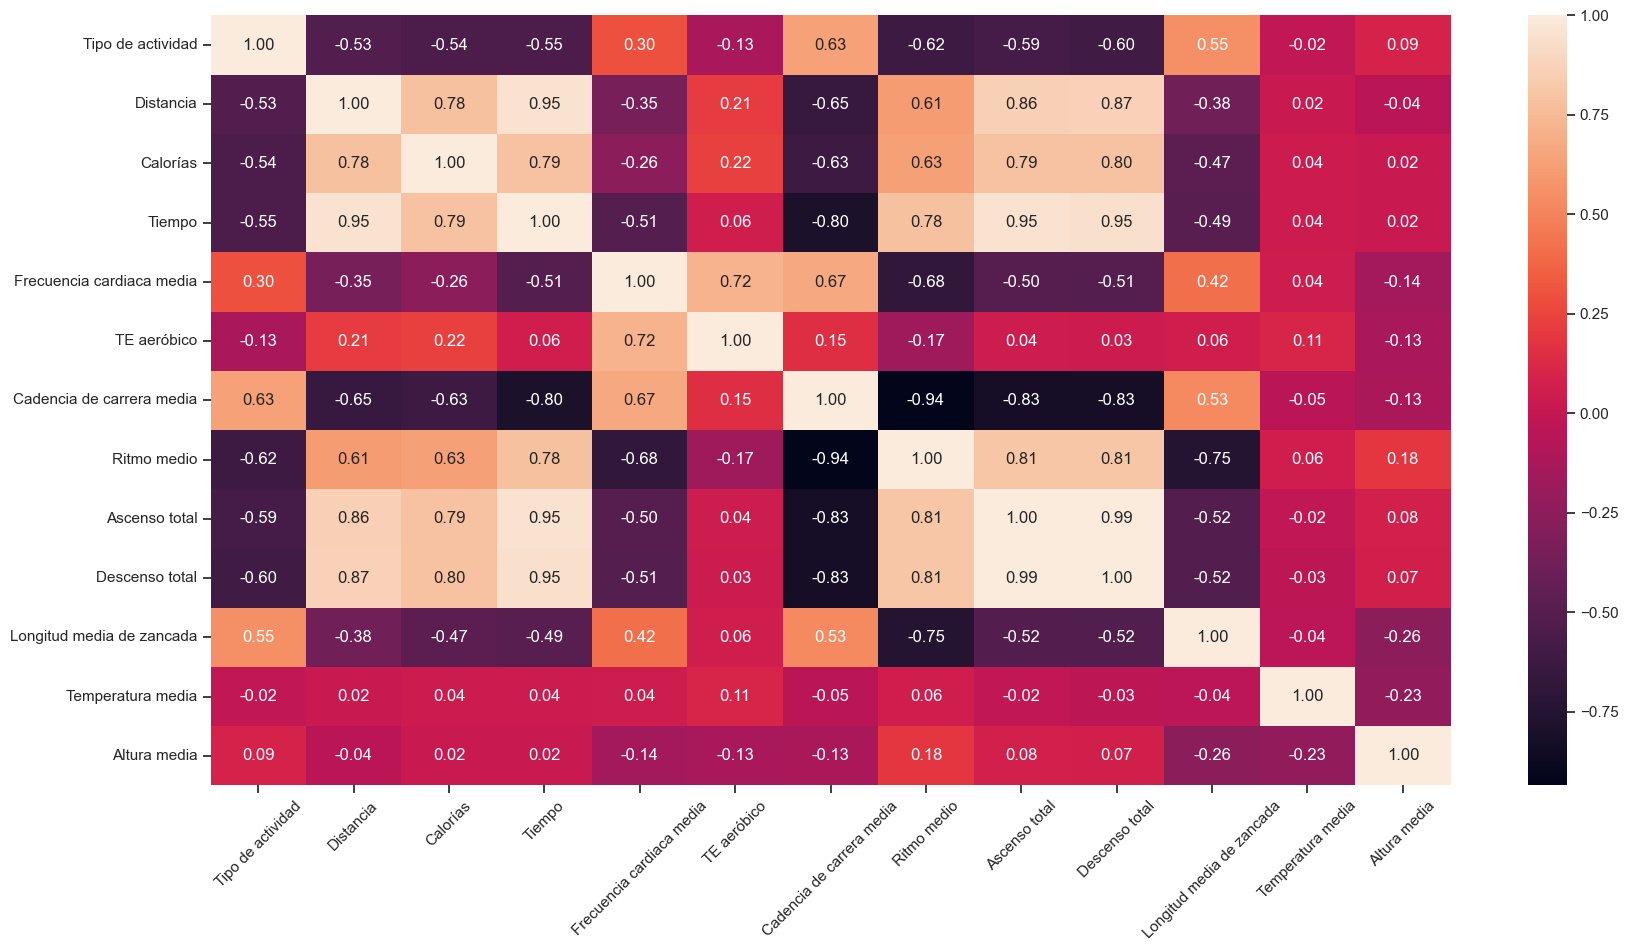

In [428]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
ax.set_xticklabels(
    labels=data.columns.values,
    rotation=45,
    horizontalalignment='center'
);
plt.show()

### Eliminamos los campos con mucha realacion

- `Tiempo` 


In [429]:
data.drop(['Tiempo'], axis=1, inplace=True)

### Volvemos a pintar la matriz de correlación 

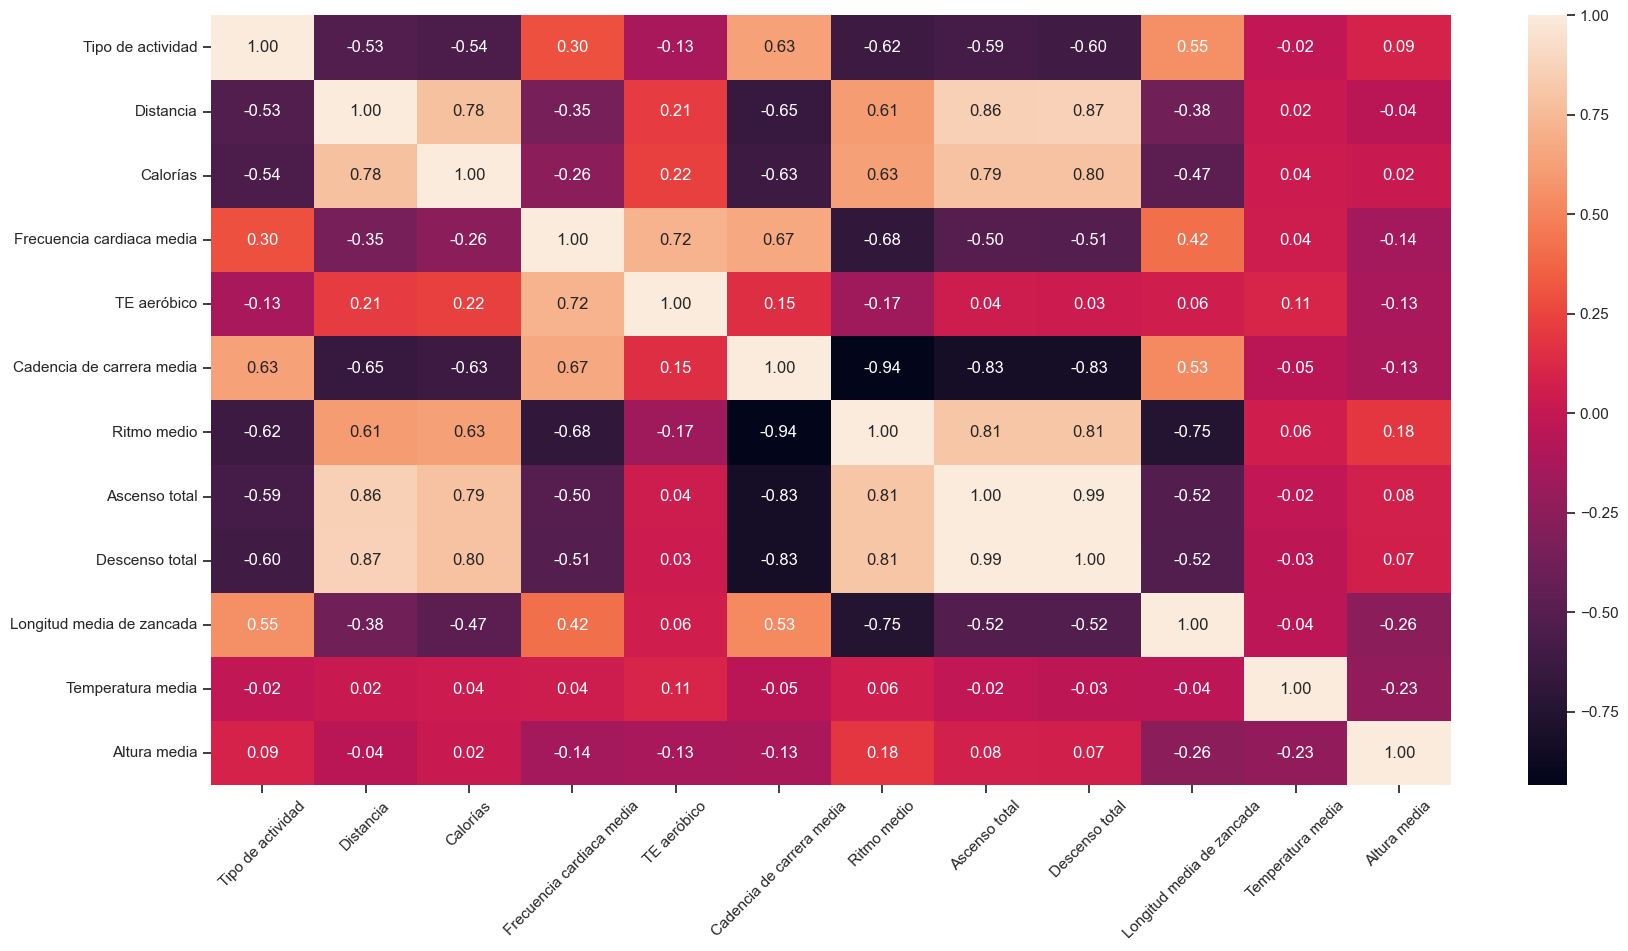

In [430]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
ax.set_xticklabels(
    labels=data.columns.values,
    rotation=45,
    horizontalalignment='center'
);
plt.show()

### Mostrar comparativa por pares de variables.

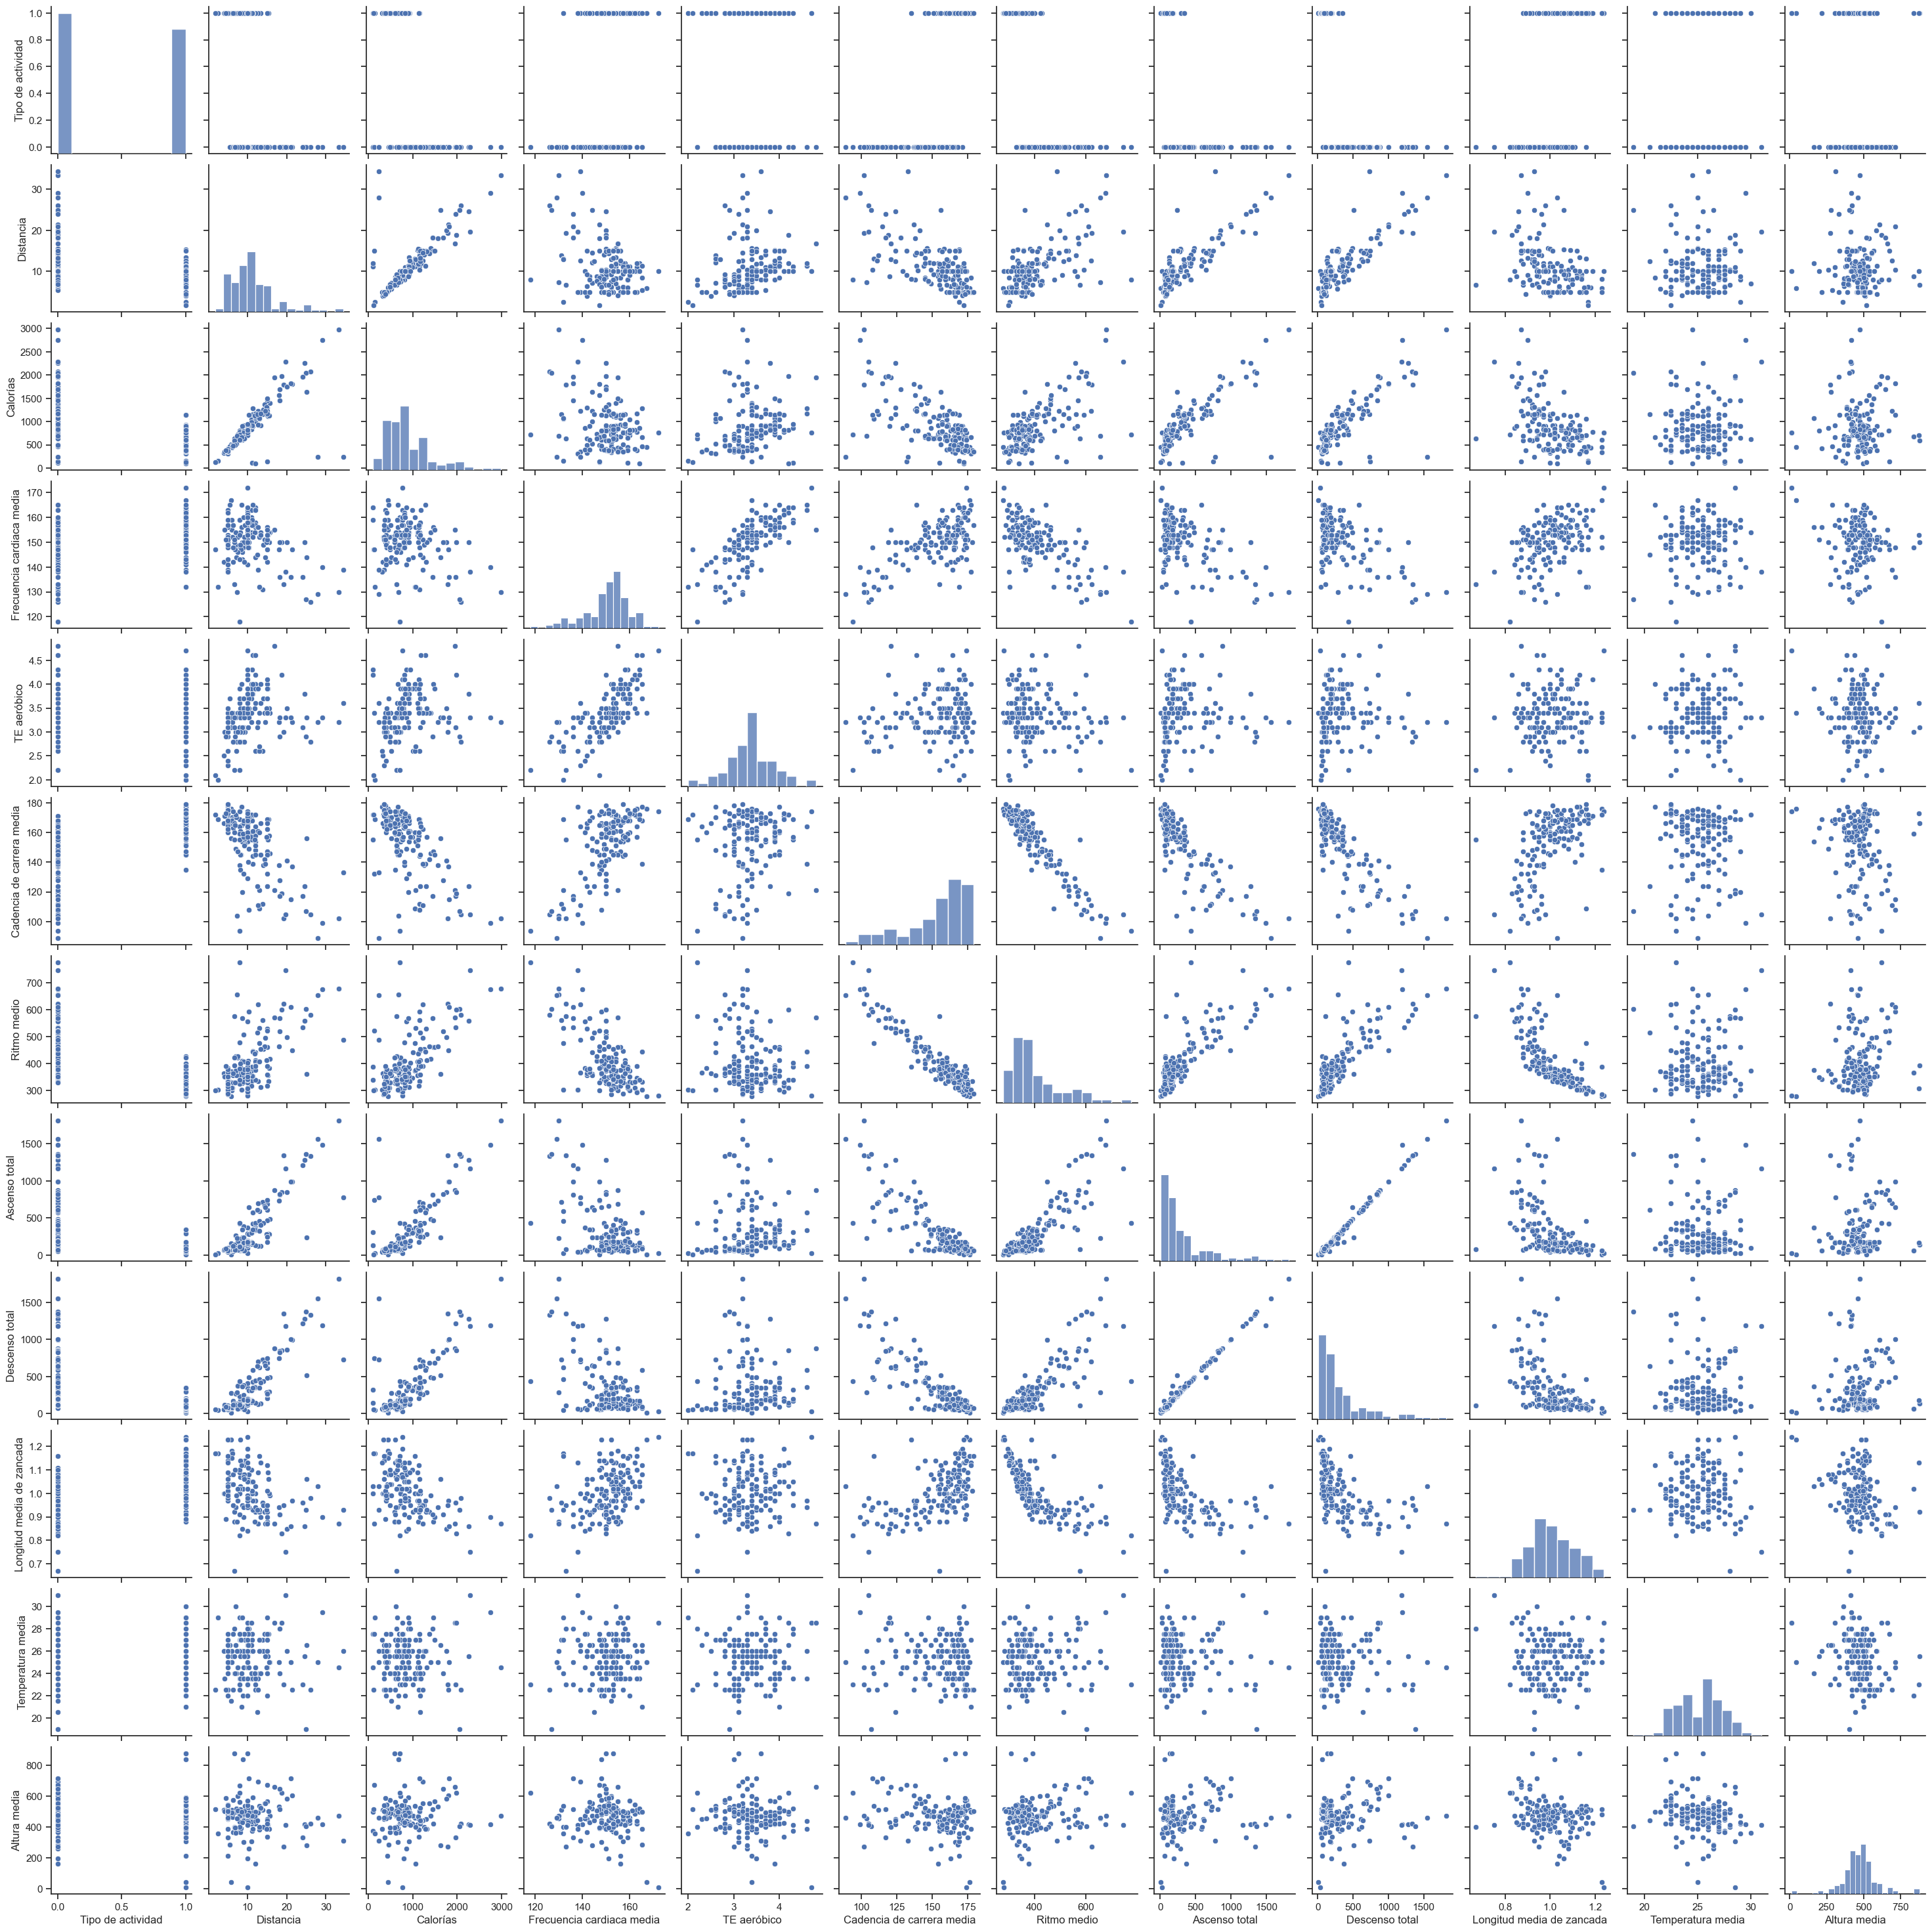

In [431]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)
plt.show()

# Entrenamiento de los datos

## Dataframe completo

### Dividimos el Dataframe en `Xtrain`, `Xtest` , `Ytrain` y `Ytest`

In [432]:
X_data =data.drop('Calorías', axis=1)
Y_data =data['Calorías']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_data, Y_data, test_size=0.2, random_state=7)

### Comparativa entre NaiveBayes y KNN

#### Modelo NaiveBayes

In [433]:
cv = KFold(n_splits = 5, shuffle = True) 
total_scores = []
names = ["GaussianNB", "MultiNomialNB", 'BernouilliNB', 'ComplementNB']
classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB()]
for name, clf in zip(names, classifiers):
  fold_accuracy = []
  for train_fold, test_fold in cv.split(Xtrain):
    f_train_x = Xtrain.iloc[train_fold] 
    f_train_y = Ytrain.iloc[train_fold]
    clf.fit(f_train_x, f_train_y)
    y_pred = clf.predict(Xtrain.iloc[test_fold])
    acc = accuracy_score(Ytrain.iloc[test_fold], y_pred)
    fold_accuracy.append(acc)
  total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

for i in range(len(names)):
  print ("Modelo: %s = %6.2f" % (names[i], total_scores[i]))

Modelo: GaussianNB =   0.00
Modelo: MultiNomialNB =   0.00
Modelo: BernouilliNB =   0.00
Modelo: ComplementNB =   0.00


#### Modelo KNN

*Buscamos el mejor `N_vecinos` y `weights`*

In [434]:
res = {}
weights = ['uniform', 'distance']
for K in range(1,50):
    for W in weights:
        knn = KNeighborsRegressor(K, weights=W)
        knn.fit(Xtrain, Ytrain)

        #Cross validation
        scores = cross_val_score(knn, Xtrain, Ytrain, cv=5)
        res[np.mean(scores)] = [K, W]

print(f'Resultado => {max(res)}, Valores => {res[max(res)]}')

Resultado => 0.5347893542632207, Valores => [20, 'uniform']


### Entrenamos el modelo

Con la comparativa emtre los dos modelos y vemos que el mejor es KNN

In [435]:
model = KNeighborsRegressor(res[max(res)][0], weights=res[max(res)][1])
model.fit(Xtrain, Ytrain)

KNeighborsRegressor(n_neighbors=20)

### Guardamos la prediccion en `predict`

In [436]:
predict = model.predict(Xtest)

### Comprobamos el resultado

Text(0, 0.5, 'Calorias predichas')

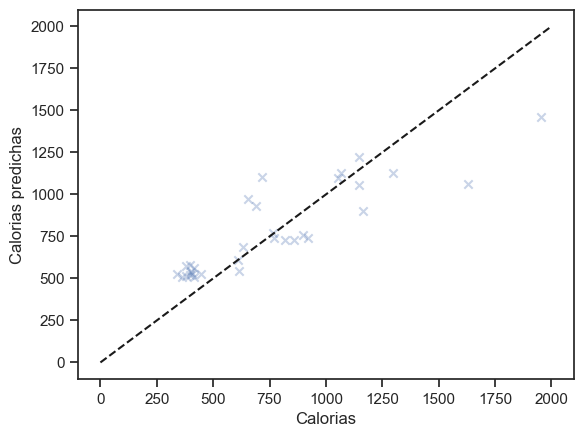

In [437]:
plt.scatter(Ytest, predict , alpha = 0.3, marker = 'x')
plt.plot([0, 2000], [0, 2000], "--k")
plt.axis("tight")
plt.xlabel("Calorias")
plt.ylabel("Calorias predichas")

## Dataframe seleccionado

Vieno la matriz de correlacion surgio la idea de realizar el entrenamiento del modelo solo con los datos con correlacion positiva con las calorias.

Es decir con los siguientes campos:

- Distancia
- TE aeróbico
- Ritmo medio
- Ascenso total
- Descenso total
- Temperatura media
- Altura media

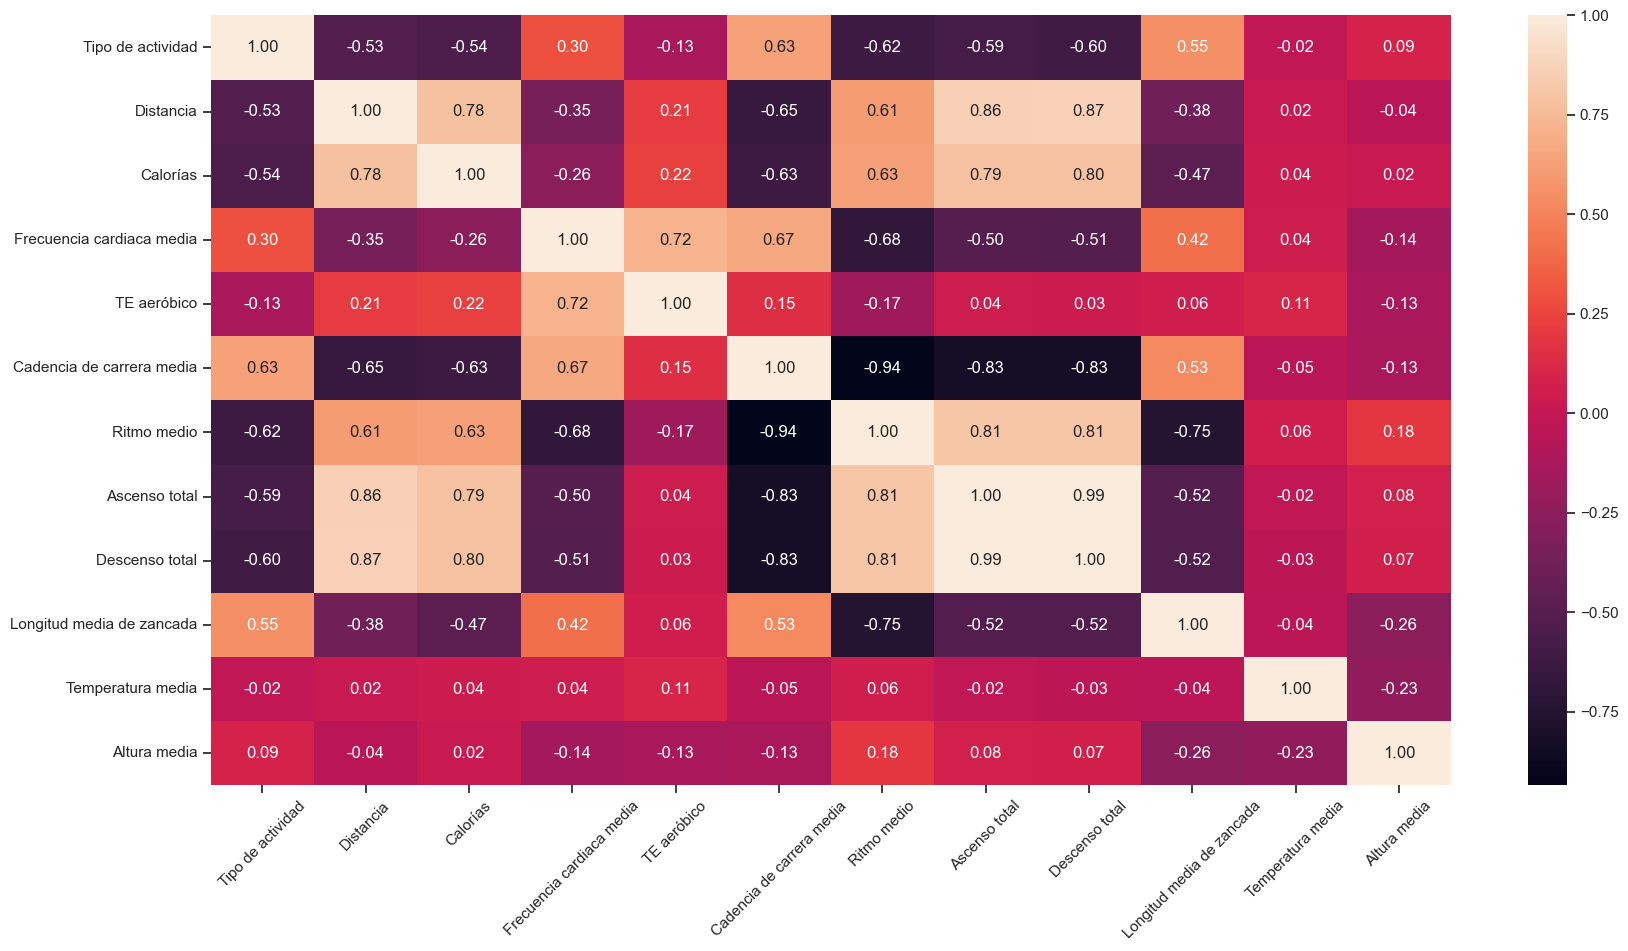

In [438]:
dataShort = data[['Distancia', 'TE aeróbico', 'Ritmo medio', 'Ascenso total', 'Descenso total' ,'Temperatura media', 'Altura media', 'Calorías']]
dataShort

,Distancia,TE aeróbico,Ritmo medio,Ascenso total,Descenso total,Temperatura media,Altura media,Calorías
0,21.48,3.2,448,991,999,22.5,604.5,1802
1,8.46,3.3,334,93,103,24.0,498.0,673
2,11.11,4.0,372,322,326,23.5,459.5,1044
3,8.02,3.1,477,425,425,23.5,667.0,810
4,12.08,2.6,441,345,345,23.0,472.5,1007
...,...,...,...,...,...,...,...,...
148,5.01,3.5,332,61,70,24.5,543.0,417
149,6.30,2.8,364,126,119,22.5,575.5,487
150,5.01,3.1,325,65,79,22.5,542.0,364
151,10.01,3.8,352,176,181,22.0,571.5,825


### Dividimos el Dataframe en `Xtrain`, `Xtest` , `Ytrain` y `Ytest`

In [439]:
X_dataS =dataShort.drop('Calorías', axis=1)
Y_dataS =dataShort['Calorías']
XtrainS, XtestS, YtrainS, YtestS = train_test_split(X_dataS, Y_dataS, test_size=0.2, random_state=7)

### Comparativa entre NaiveBayes y KNN

#### Modelos NaiveBayes

In [440]:
cv = KFold(n_splits = 5, shuffle = True) 
total_scores = []
names = ["GaussianNB", "MultiNomialNB", 'BernouilliNB', 'ComplementNB']
classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB()]
for name, clf in zip(names, classifiers):
  fold_accuracy = []
  for train_fold, test_fold in cv.split(XtrainS):
    f_train_x = XtrainS.iloc[train_fold] 
    f_train_y = YtrainS.iloc[train_fold]
    clf.fit(f_train_x, f_train_y)
    y_pred = clf.predict(XtrainS.iloc[test_fold])
    acc = accuracy_score(YtrainS.iloc[test_fold], y_pred)
    fold_accuracy.append(acc)
  total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

for i in range(len(names)):
  print ("Modelo: %s = %6.2f" % (names[i], total_scores[i]))

Modelo: GaussianNB =   0.00
Modelo: MultiNomialNB =   0.00
Modelo: BernouilliNB =   0.00
Modelo: ComplementNB =   0.01


#### Modelo KNN

*Buscamos el `N_vecinos`y `weights` que usaremos*

In [441]:
resS = {}
weights = ['uniform', 'distance']
for K in range(1,50):
    for W in weights:
        knn = KNeighborsRegressor(K, weights=W)
        knn.fit(XtrainS, YtrainS)

        #Cross validation
        scores = cross_val_score(knn, XtrainS, YtrainS, cv=5)
        resS[np.mean(scores)] = [K, W]

print(f'Resultado => {max(resS)}, Valores => {resS[max(resS)]}')

Resultado => 0.5346674638040693, Valores => [20, 'uniform']


### Entrenamos el modelo

Con la comparativa emtre los dos modelos y vemos que el mejor es KNN

In [442]:
modelS = KNeighborsRegressor(resS[max(resS)][0], weights=resS[max(resS)][1])
modelS.fit(XtrainS, YtrainS)

KNeighborsRegressor(n_neighbors=20)

#### Guardamos la prediccion en `predict`

In [443]:
predictS = modelS.predict(XtestS)

#### Comprobamos el resultado

Text(0, 0.5, 'Calorias predichas')

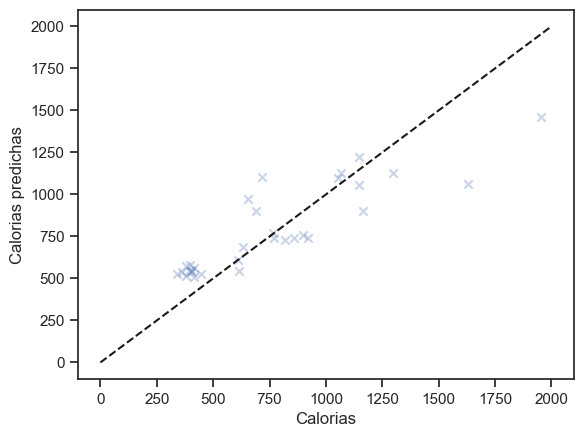

In [444]:
plt.scatter(YtestS, predictS , alpha = 0.3, marker = 'x')
plt.plot([0, 2000], [0, 2000], "--k")
plt.axis("tight")
plt.xlabel("Calorias")
plt.ylabel("Calorias predichas")

## Exportacion del modelo y Comprobacion

### Exportando el Modelo

Como podemos obesrvar tenemos el mismo acierto en el data frame seleccionado y en el completo asique para realizar la api y las comprobaciones finales uare el selecionado.

In [445]:
joblib.dump(modelS,'./modelo/rendimientodeportivo.pkl')

['./modelo/rendimientodeportivo.pkl']

### Importamos el Modelo

In [446]:
clf_entrenado = KNeighborsRegressor()
clf_entrenado = joblib.load('./modelo/rendimientodeportivo.pkl')

### Predecimos con todos los datos

Text(0, 0.5, 'Calorias predichas')

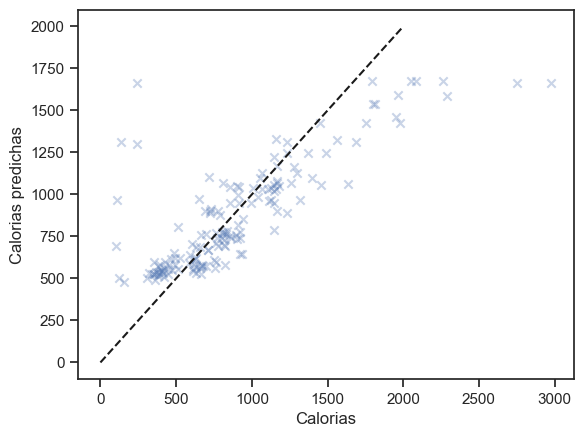

In [447]:
X_dataS =dataShort.drop('Calorías', axis=1)
Y_dataS =dataShort['Calorías']

predictF = modelS.predict(X_dataS)
plt.scatter(Y_dataS, predictF , alpha = 0.3, marker = 'x')
plt.plot([0, 2000], [0, 2000], "--k")
plt.axis("tight")
plt.xlabel("Calorias")
plt.ylabel("Calorias predichas")